<a href="https://colab.research.google.com/github/oumaima61/my-machine-learning-projects/blob/master/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing Needed packages 

In [ ]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 

Understanding the Data

Reading the data in 

In [ ]:
df = pd.read_csv("heart.csv") 
df.head(20) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

adress a missing data 

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Data Exploration 

Lets first have a descriptive exploration on our data.

In [ ]:
df.describe 

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   2

Lets select some features to explore more.

In [ ]:
cdf = df[['age','sex','cp','trestbps','chol','fbs','thalach','oldpeak','slope','thal']] 
cdf.head(20) 

,age,sex,cp,trestbps,chol,fbs,thalach,oldpeak,slope,thal
0,63,1,3,145,233,1,150,2.3,0,1
1,37,1,2,130,250,0,187,3.5,0,2
2,41,0,1,130,204,0,172,1.4,2,2
3,56,1,1,120,236,0,178,0.8,2,2
4,57,0,0,120,354,0,163,0.6,2,2
5,57,1,0,140,192,0,148,0.4,1,1
6,56,0,1,140,294,0,153,1.3,1,2
7,44,1,1,120,263,0,173,0.0,2,3
8,52,1,2,172,199,1,162,0.5,2,3
9,57,1,2,150,168,0,174,1.6,2,2


In [ ]:
cdf = df[['age','sex','cp','trestbps','chol','fbs','thalach','oldpeak','slope','thal']] 
cdf.tail(20) 

,age,sex,cp,trestbps,chol,fbs,thalach,oldpeak,slope,thal
283,40,1,0,152,223,0,181,0.0,2,3
284,61,1,0,140,207,0,138,1.9,2,3
285,46,1,0,140,311,0,120,1.8,1,3
286,59,1,3,134,204,0,162,0.8,2,2
287,57,1,1,154,232,0,164,0.0,2,2
288,57,1,0,110,335,0,143,3.0,1,3
289,55,0,0,128,205,0,130,2.0,1,3
290,61,1,0,148,203,0,161,0.0,2,3
291,58,1,0,114,318,0,140,4.4,0,1
292,58,0,0,170,225,1,146,2.8,1,1


visualize our data 

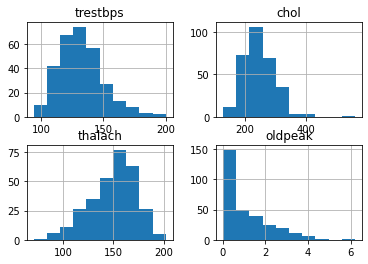

In [ ]:
viz = cdf[['trestbps','chol','thalach','oldpeak']] 
viz.hist() 
plt.show() 

Now , We're going to first do some basic data cleaning on this data:

   Converting categorical variables to dummies
   Making skew variables symmetric


One-hot encoding for dummy variables:

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

df[one_hot_encode_cols].head().T

,0,1,2,3,4


In [ ]:
# Do the one hot encoding
df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Log transforming skew variables

In [ ]:
# Create a list of float colums to check for skewing
mask = df.dtypes == np.float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()

In [ ]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
oldpeak,1.26972


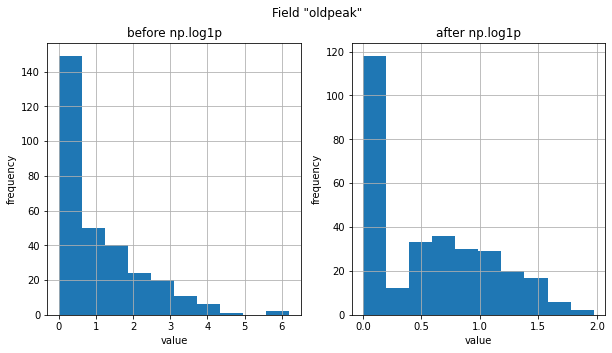

In [ ]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "oldpeak"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [ ]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [ ]:
# We now have a larger set of potentially-useful features
df.shape

(303, 14)

In [ ]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
cdf = df
df.isnull().sum().sort_values()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Let's pick out just a few numeric columns to illustrate basic feature transformations.

In [ ]:
smaller_df= df.loc[:,['age', 'sex', 'cp', 
                      'trestbps', 'chol', 'fbs', 
                      'restecg', 'thalach', 'exang', 
                      'oldpeak','slope','ca','thal','target']]

In [ ]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.000000,61.000000,77.000000
sex,303.0,0.683168,0.466011,0.0,0.0,1.000000,1.000000,1.000000
cp,303.0,0.966997,1.032052,0.0,0.0,1.000000,2.000000,3.000000
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.000000,140.000000,200.000000
chol,303.0,246.264026,51.830751,126.0,211.0,240.000000,274.500000,564.000000
fbs,303.0,0.148515,0.356198,0.0,0.0,0.000000,0.000000,1.000000
restecg,303.0,0.528053,0.525860,0.0,0.0,1.000000,1.000000,2.000000
thalach,303.0,149.646865,22.905161,71.0,133.5,153.000000,166.000000,202.000000
exang,303.0,0.326733,0.469794,0.0,0.0,0.000000,1.000000,1.000000
oldpeak,303.0,0.569944,0.524336,0.0,0.0,0.587787,0.955511,1.974081


In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [ ]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Simple Regression Model 

Creating train and test dataset


Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using np.random.rand() function: 

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk] 
test = cdf[~msk]  

Train data distribution 

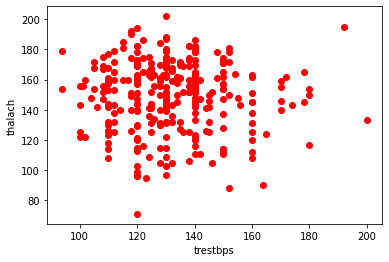

In [ ]:
plt.scatter(cdf.trestbps, cdf.thalach,  color='red')
plt.xlabel("trestbps")
plt.ylabel("thalach")
plt.show() 

**modeling **


Using sklearn package to model data.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['trestbps']])
train_y = np.asanyarray(train[['thalach']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_) 

Coefficients:  [[-0.03038532]]
Intercept:  [153.59063692]


As mentioned before, Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. Notice that all of the data must be available to traverse and calculate the parameters.

Plot outputs 

We can plot the fit line over the data:

Text(0, 0.5, 'thalach')

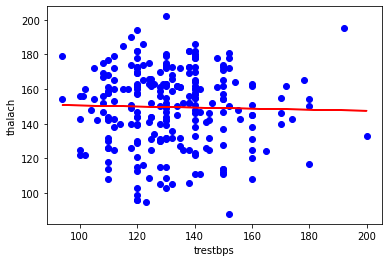

In [ ]:
plt.scatter(train.trestbps, train.thalach,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("trestbps")  
plt.ylabel("thalach") 

Evaluation 

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['trestbps']])
test_y = np.asanyarray(test[['thalach']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 20.54
Residual sum of squares (MSE): 689.80
R2-score: 0.01
